<a href="https://colab.research.google.com/github/theFulminatedHuman/Risk-Analysis---Quant/blob/main/Meme_Stock_Volatility_Prediction_using_Reddit_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 11.1 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

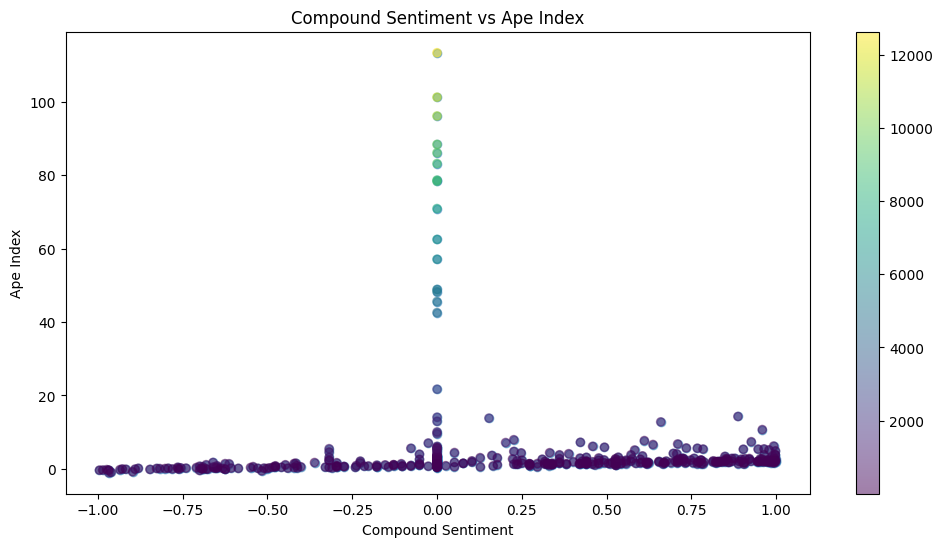

Data collection and sentiment analysis complete. Plot saved as 'sentiment_vs_ape_index.png'


In [36]:
import pandas as pd
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

nltk.download('vader_lexicon', quiet=True)

# Reddit API setup
reddit = praw.Reddit(
    client_id="wsedOHWsM-VS_dVS3wdUyA",
    client_secret="jVw0NZHV6UussmsuatDpOh7LgIRQFg",
    user_agent="u/imvedant04"
)

def collect_reddit_data(subreddit_name, post_limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for post in subreddit.hot(limit=post_limit):
        posts.append({
            'title': post.title,
            'body': post.selftext,
            'score': post.score,
            'num_comments': post.num_comments,
            'upvote_ratio': post.upvote_ratio
        })

    return pd.DataFrame(posts)

def analyze_sentiment(df):
    sia = SentimentIntensityAnalyzer()

    df['text'] = df['title'] + " " + df['body']
    df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
    df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
    df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
    df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
    df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])

    return df

def calculate_ape_index(row):
    return (row['compound'] + row['upvote_ratio']) * (1 + row['num_comments']/100)

# Collect and process data
raw_data = collect_reddit_data("wallstreetbets")
processed_data = analyze_sentiment(raw_data)
processed_data['ape_index'] = processed_data.apply(calculate_ape_index, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(processed_data['compound'], processed_data['ape_index'], alpha=0.5)
plt.xlabel('Compound Sentiment')
plt.ylabel('Ape Index')
plt.title('Compound Sentiment vs Ape Index')
plt.colorbar(plt.scatter(processed_data['compound'], processed_data['ape_index'],
                         c=processed_data['num_comments'], alpha=0.5))
plt.savefig('sentiment_vs_ape_index.png')
plt.show()

print("Data collection and sentiment analysis complete. Plot saved as 'sentiment_vs_ape_index.png'")

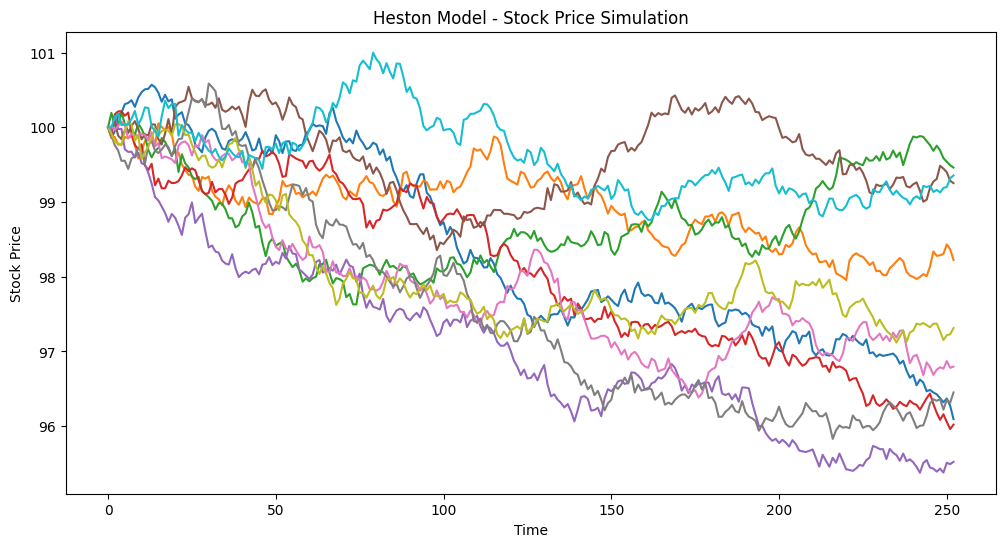

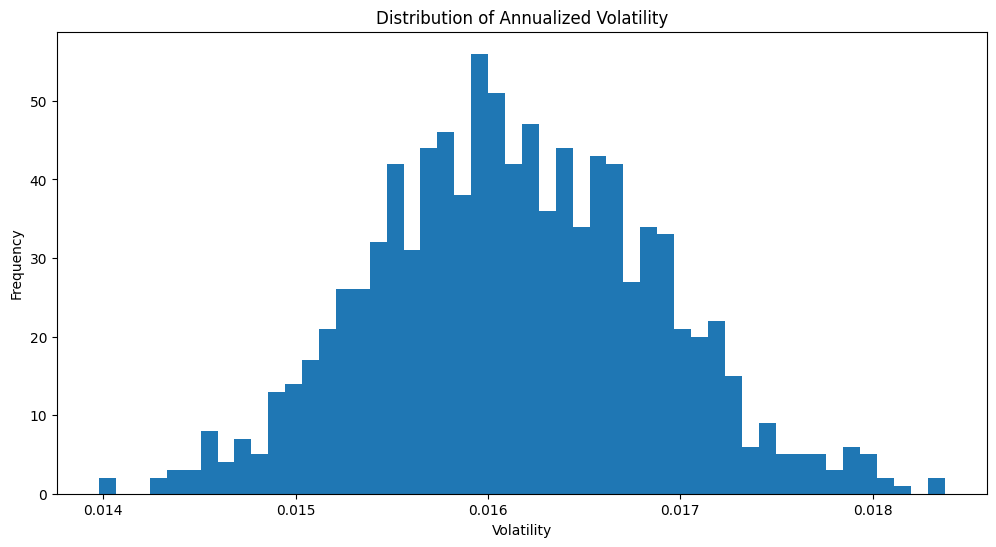

Stochastic volatility model simulation complete. Plots saved as 'stock_price_simulation.png' and 'volatility_distribution.png'


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, r, T, N, M):
    dt = T/N

    S = np.zeros((N+1, M))
    v = np.zeros((N+1, M))

    S[0] = S0
    v[0] = v0

    for i in range(1, N+1):
        dW1 = np.random.normal(0, np.sqrt(dt), M)
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), M)

        S[i] = S[i-1] * np.exp((r - 0.5*v[i-1])*dt + np.sqrt(v[i-1]*dt) * dW1)
        v[i] = np.abs(v[i-1] + kappa*(theta - v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt) * dW2)

    return S, v

# Simulate stock prices and calculate historical volatility
S0, v0, rho, kappa, theta, sigma, r, T, N, M = 100, 0.1, -0.7, 2, 0.04, 0.3, 0.01, 1, 252, 1000
S, v = heston_model_sim(S0, v0, rho, kappa, theta, sigma, r, T, N, M)
volatility = np.std(np.log(S[1:] / S[:-1]), axis=0) * np.sqrt(252)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(S[:, :10])  # Plot first 10 simulations
plt.title('Heston Model - Stock Price Simulation')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.savefig('stock_price_simulation.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(volatility, bins=50)
plt.title('Distribution of Annualized Volatility')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.savefig('volatility_distribution.png')
plt.show()

print("Stochastic volatility model simulation complete. Plots saved as 'stock_price_simulation.png' and 'volatility_distribution.png'")

<ipython-input-38-70c5ead257f0>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['volatility'] = volatility[:min_length]
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


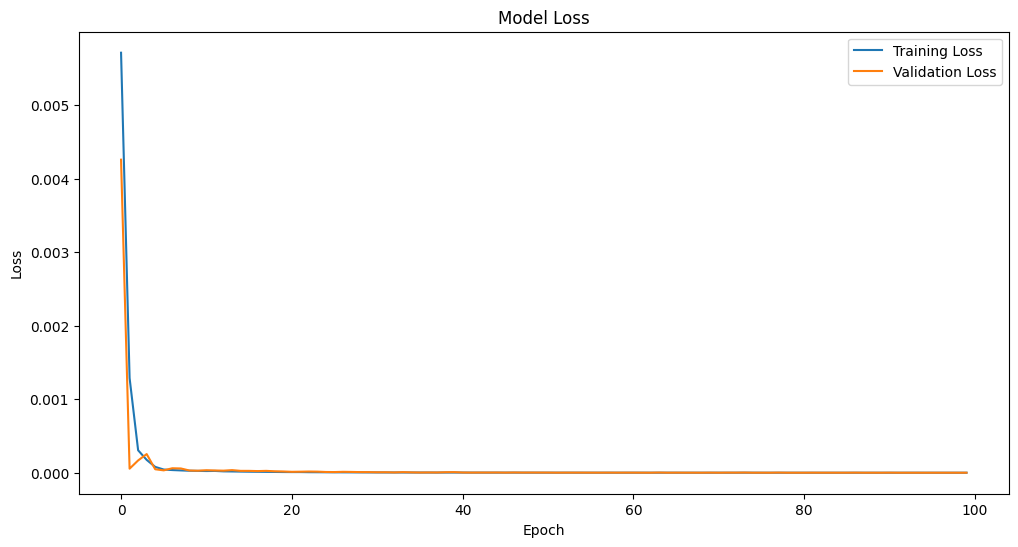

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Predicted volatility: 0.01
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


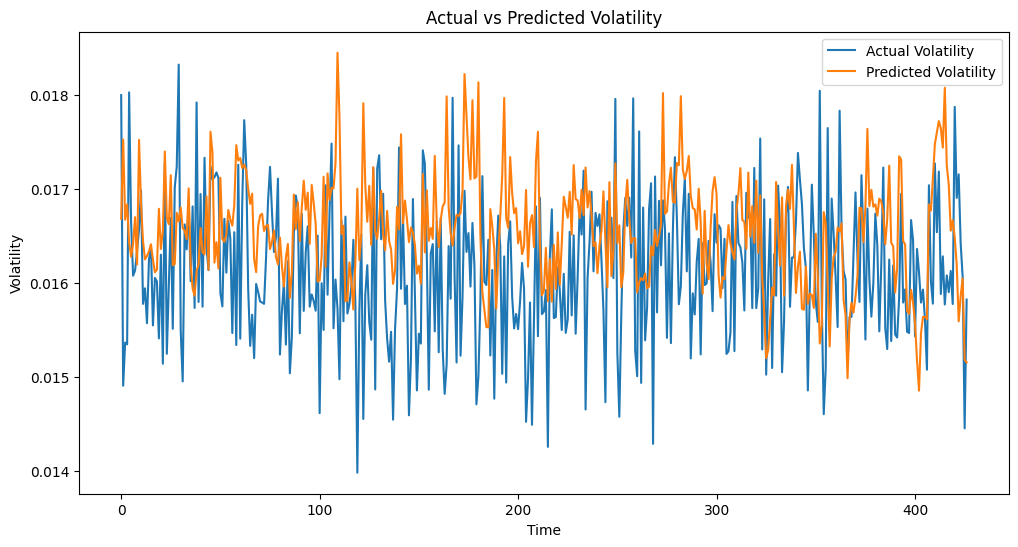

LSTM model training and prediction complete. Plots saved as 'model_training_loss.png' and 'actual_vs_predicted_volatility.png'


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def prepare_data(df, lookback=30):
    X = df[['ape_index', 'compound', 'positive', 'negative', 'neutral', 'upvote_ratio', 'num_comments']].values
    y = df['volatility'].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_seq, y_seq = [], []
    for i in range(len(X) - lookback):
        X_seq.append(X[i:i+lookback])
        y_seq.append(y[i+lookback])

    return np.array(X_seq), np.array(y_seq), scaler

def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

def predict_volatility(model, latest_data, scaler):
    X = scaler.transform(latest_data)
    X = X.reshape((1, X.shape[0], X.shape[1]))

    predicted_volatility = model.predict(X)[0][0]
    return predicted_volatility

# Assume processed_data and volatility are available from previous steps
# Ensure processed_data and volatility have the same length
min_length = min(len(processed_data), len(volatility))
processed_data = processed_data.iloc[:min_length]
processed_data['volatility'] = volatility[:min_length]

# Prepare data for the model
X, y, scaler = prepare_data(processed_data)

# Build and train the model
model = build_model((X.shape[1], X.shape[2]))
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('model_training_loss.png')
plt.show()

# Make predictions
latest_data = processed_data.iloc[-30:][['ape_index', 'compound', 'positive', 'negative', 'neutral', 'upvote_ratio', 'num_comments']].values
predicted_volatility = predict_volatility(model, latest_data, scaler)

print(f"Predicted volatility: {predicted_volatility:.2f}")

# Plot actual vs predicted volatility
predicted_volatilities = model.predict(X).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Volatility')
plt.plot(predicted_volatilities, label='Predicted Volatility')
plt.title('Actual vs Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.savefig('actual_vs_predicted_volatility.png')
plt.show()

print("LSTM model training and prediction complete. Plots saved as 'model_training_loss.png' and 'actual_vs_predicted_volatility.png'")